In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, adjusted_rand_score


In [78]:
df = pd.read_csv('data/Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [79]:
#drop unnecessary cols
df.drop(['day','month', 'year'], axis=1, inplace=True)

In [80]:
#Encoding of Classes into categories and remove extra spaces and converting to lowercase
df['Classes'] = df['Classes'].apply(lambda x: 0 if x.strip().lower()=='not fire' else 1 )
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [81]:
#Independent and dependent features
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [82]:
#Train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain.shape, ytrain.shape

((194, 11), (194,))

In [83]:
#Feature selection based on correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [84]:
#Check for multicollinearity
xc = Xtrain.corr()


In [85]:
def correlation(dataset, threshold):
    corr_matrix = dataset.corr()
    features_to_remove = set()

    for col in corr_matrix.columns:
        for row in corr_matrix.index:
            if col != row and corr_matrix.loc[row, col] > threshold:
                if col not in features_to_remove and row not in features_to_remove:
                    features_to_remove.add(row)
    return features_to_remove

corr_features = correlation(Xtrain, 0.85)
corr_features

{'BUI', 'DC'}

In [86]:
#drop features when correlation is more than 0.85
Xtrain.drop(corr_features, axis=1, inplace=True)
Xtest.drop(corr_features, axis=1, inplace=True)

### Feature scaling

In [87]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

### Box plots  to understand effects of standard scaler


Text(0.5, 1.0, 'Xtrain after scaling')

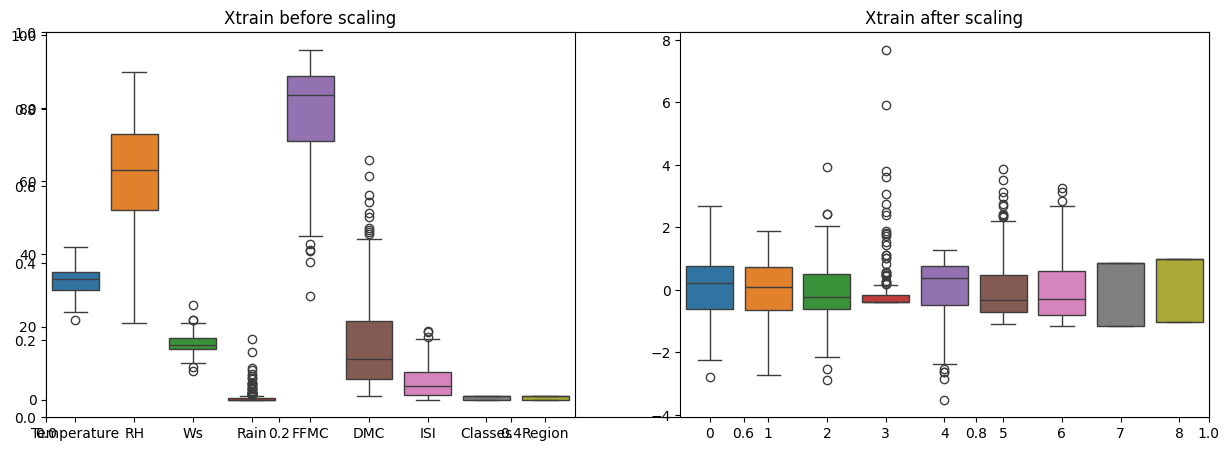

In [88]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=Xtrain)
plt.title("Xtrain before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=Xtrain_scaled)
plt.title("Xtrain after scaling")
